In [10]:
# trash_classification.ipynb

# Step 1: Setup Environment
!pip install -r requirements.txt

In [1]:
# Step 2: Data Preparation
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
def load_images_from_folder(folder):
    images = []
    labels = []
    label_map = {
        'cardboard': 0,
        'glass': 1,
        'metal': 2,
        'paper': 3,
        'plastic': 4,
        'trash': 5
    }
    for label_name in os.listdir(folder):
        label_folder = os.path.join(folder, label_name)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((150, 150))
                img = np.array(img) / 255.0
                images.append(img)
                labels.append(label_map[label_name])
    return np.array(images), np.array(labels)

# Load data
# data_dir = r'I:\MyCode\Adamata-ML\dataset-resized'
data_dir = './dataset-resized'
X, y = load_images_from_folder(data_dir)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

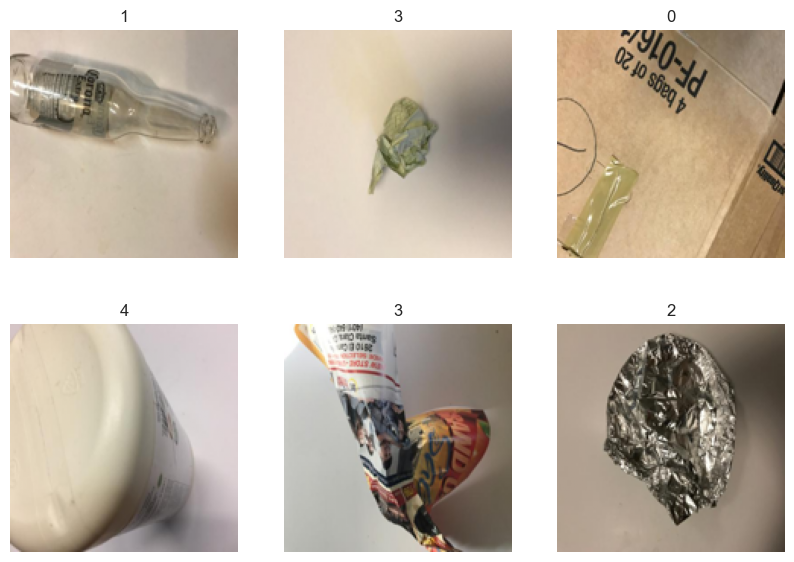

In [2]:
# Step 3: Exploratory Image Analysis
# Visualize sample images
def plot_sample_images(X, y):
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i])
        ax.set_title(y[i])
        ax.axis('off')
    plt.show()

plot_sample_images(X_train, y_train)

In [3]:
# Step 4: Model Development
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(6, activation='softmax')
    ])
    return model


In [5]:
# Compile model
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

C:\Users\Asus\AppData\Local\JetBrains\PyCharm2024.1\demo\PyCharmLearningProject\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 560ms/step - accuracy: 0.2723 - loss: 1.8008 - val_accuracy: 0.4644 - val_loss: 1.3399
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 528ms/step - accuracy: 0.4806 - loss: 1.2853 - val_accuracy: 0.5198 - val_loss: 1.2834
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 526ms/step - accuracy: 0.5889 - loss: 1.0879 - val_accuracy: 0.5646 - val_loss: 1.1785
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 527ms/step - accuracy: 0.6724 - loss: 0.9141 - val_accuracy: 0.5594 - val_loss: 1.2560
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 518ms/step - accuracy: 0.7170 - loss: 0.7516 - val_accuracy: 0.5884 - val_loss: 1.1952
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 507ms/step - accuracy: 0.8141 - loss: 0.5481 - val_accuracy: 0.6201 - val_loss: 1.3033
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 508ms/step - accuracy: 0.8626 - loss: 0.4077 - val_accuracy: 0.6042 - val_loss: 1.4970
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 530ms/step - accuracy: 0.9141 - loss: 0.2681 - val_accu

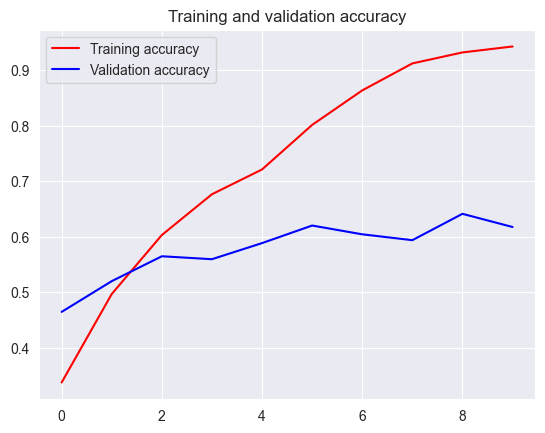

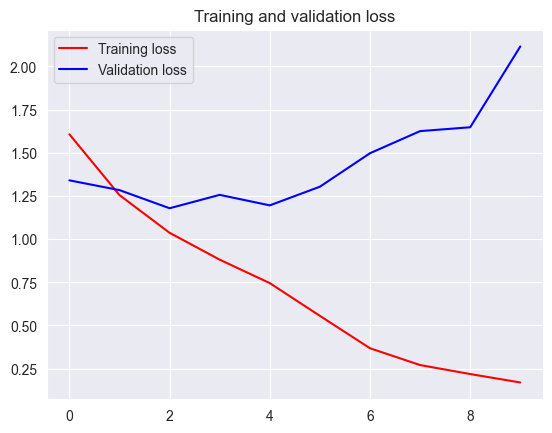

In [7]:
# Plot accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure()
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history)


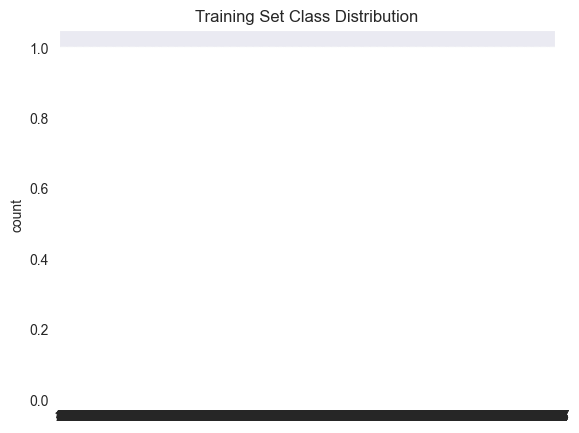

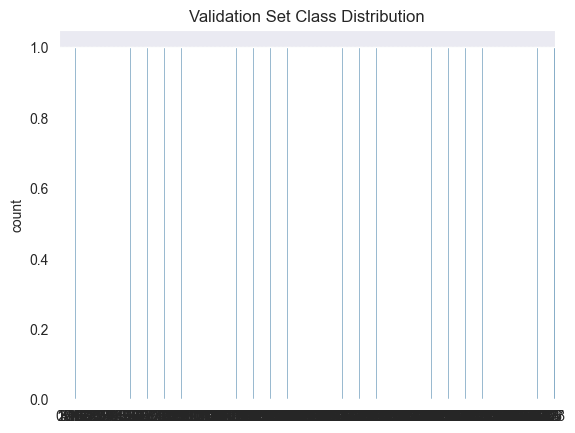

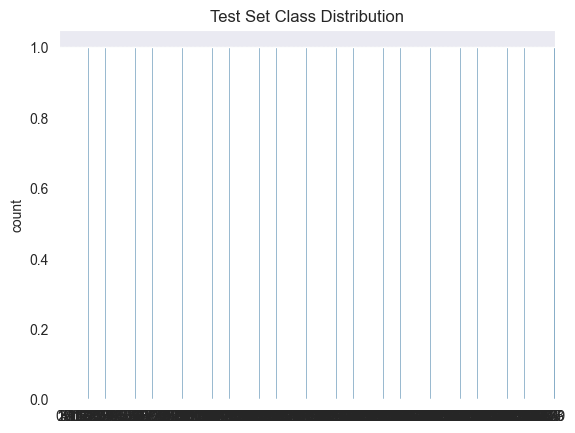

In [9]:
# Step 5: Model Analysis and Insights
# Analyze class distribution and potential biases
import seaborn as sns

def plot_class_distribution(y, title):
    sns.countplot(y)
    plt.title(title)
    plt.show()

plot_class_distribution(y_train, 'Training Set Class Distribution')
plot_class_distribution(y_val, 'Validation Set Class Distribution')
plot_class_distribution(y_test, 'Test Set Class Distribution')

# Save model
model.save('trash_classification_model.h5')


In [10]:
# Step 6: Automate with GitHub Actions
# Create a .github/workflows/main.yml file for CI/CD

# Step 7: Model Versioning with Weights & Biases
import wandb
wandb.login()

# Initialize W&B run
wandb.init(project="trash-classification")
wandb.config.update({
    "epochs": 10,
    "batch_size": 32,
    "learning_rate": 0.001
})

# Log model to W&B
wandb.log({"accuracy": test_acc, "loss": test_loss})

# Save model to W&B
wandb.save('trash_classification_model.h5')


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 6
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 1
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to q

OSError: [WinError 1314] A required privilege is not held by the client: 'I:\\MyCode\\Adamata-ML\\trash_classification_model.h5' -> 'I:\\MyCode\\Adamata-ML\\wandb\\run-20240527_151640-vrxf1qni\\files\\trash_classification_model.h5'